# Prediction of students dropout and academic success

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [2]:
df= pd.read_csv("STUDENTS DROPOUT PREDICTION DATASET.txt", delimiter=';')

In [3]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance;,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
3626,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
3627,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
3628,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [4]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance;', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd 

In [5]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance;                       0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [6]:
for column in df.columns:
    if df[column].isnull().any():  
        mean_value = df[column].mean()  
        df[column] = df[column].fillna(mean_value) 
df.columns = df.columns.str.strip()

df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance;                       0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

# Initial Summary


In [7]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance;,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,18.421763,1.750138,8853.980992,0.887603,4.532231,132.920606,1.828099,19.986226,22.571625,...,0.128926,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256
std,0.613009,17.358595,1.333831,2068.760082,0.315897,10.024134,13.238373,6.667614,15.585278,15.275453,...,0.679111,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance;                     3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Previous qualification (grade)                  3630 non-null   float64
 7   Nacionality                                     3630 non-null   int64  
 8   Mother's qualification                          3630 non-null   int64  
 9   Father's qualification                   

### Separating Numerical and Categorical Columns

In [9]:
numerical_columns = df.select_dtypes(include=[int, float]).columns
categorical_columns = df.select_dtypes(include=[object]).columns

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance;', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Cu

# Box Plot to see Outliers

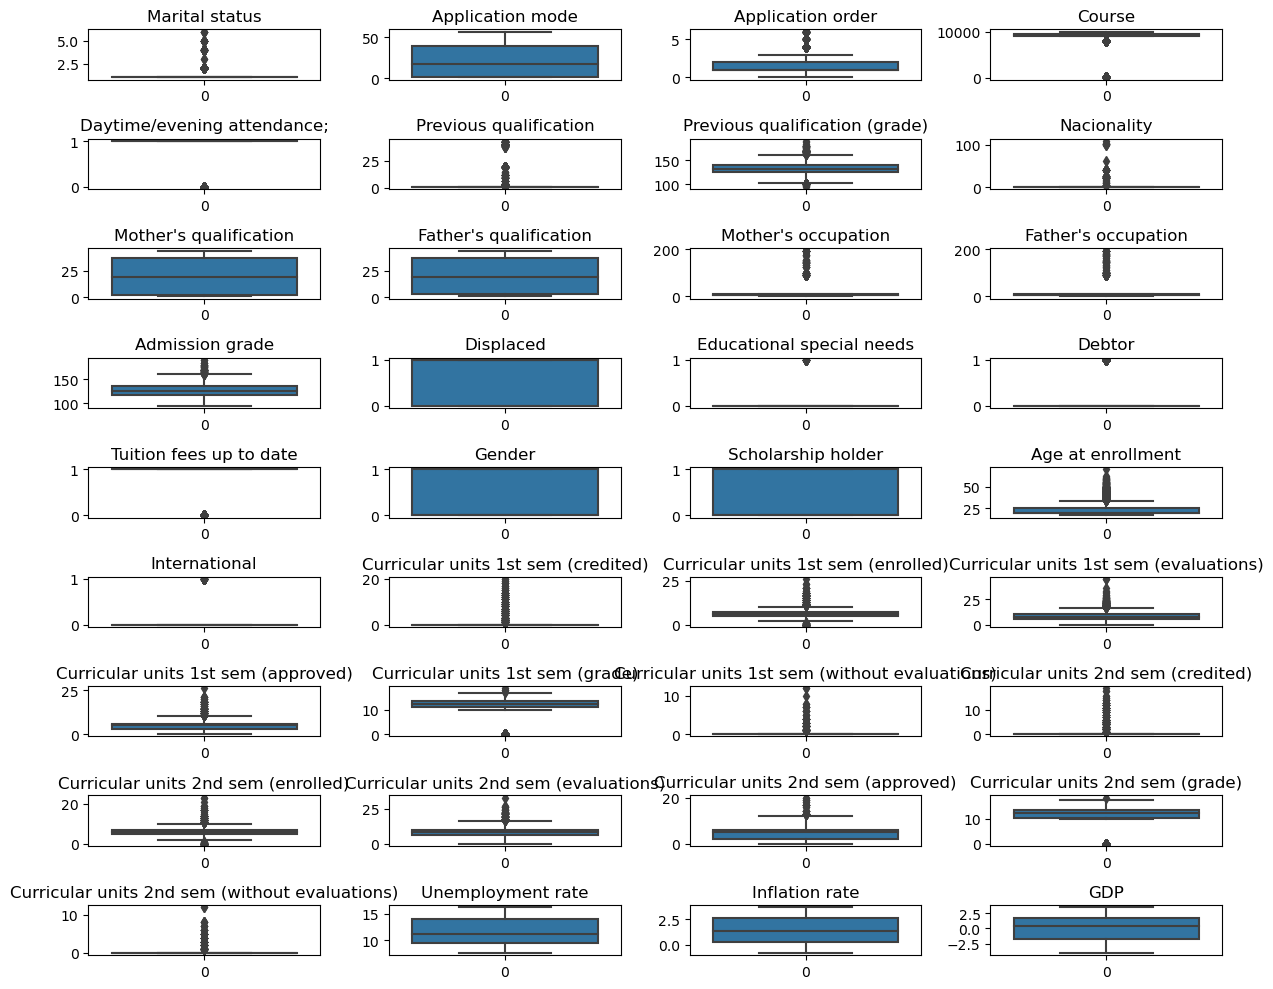

In [10]:
plt.figure(figsize=(12, 10))
num_plots = len(numerical_columns)
num_rows = (num_plots - 1) // 4 + 1  # Calculate the number of rows needed
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 4, i)  # Adjust the number of columns to 4
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


## Removing Outliers

In [11]:
def remove_outliers(df):
    for column in df.select_dtypes(include=['int', 'float']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from all numerical columns
df_cleaned = remove_outliers(df)



# Cross Validation (With and Without)

In [12]:
def evaluate_classifier(df, pos_label, dataset_Name):

    # Convert non-numeric columns to numeric using LabelEncoder
    df_numeric = df.apply(LabelEncoder().fit_transform)

    # Impute missing values
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

    # Split the dataset into features (X) and target (y)
    X = df_imputed.drop(columns=['Target'])
    y = df_imputed['Target']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train K-Nearest Neighbors (KNN) classifier without cross-validation
    knn_no_cv = KNeighborsClassifier()
    knn_no_cv.fit(X_train_scaled, y_train)

    # Evaluate performance metrics without cross-validation
    y_pred_no_cv = knn_no_cv.predict(X_test_scaled)
    accuracy_no_cv = accuracy_score(y_test, y_pred_no_cv)
    precision_no_cv = precision_score(y_test, y_pred_no_cv, pos_label=pos_label)
    recall_no_cv = recall_score(y_test, y_pred_no_cv, pos_label=pos_label)
    f1_score_no_cv = f1_score(y_test, y_pred_no_cv, pos_label=pos_label)
    f1_score_pos_no_cv = f1_score(y_test, y_pred_no_cv, pos_label=pos_label)

    # Calculate F1 score for negative class
    neg_label = 1 if pos_label == 0 else 0
    y_pred_neg_no_cv = 1 - y_pred_no_cv
    f1_score_neg_no_cv = f1_score(1 - y_test, y_pred_neg_no_cv, pos_label=neg_label)

    # Train KNN classifier using k-fold cross-validation
    knn_cv = KNeighborsClassifier()
    cv_results = cross_validate(knn_cv, X_train_scaled, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

    # Extracting cross-validation scores
    avg_accuracy_cv = np.mean(cv_results['test_accuracy'])
    avg_precision_cv = np.mean(cv_results['test_precision'])
    avg_recall_cv = np.mean(cv_results['test_recall'])
    avg_f1_score_cv = np.mean(cv_results['test_f1'])
    avg_auc_cv = np.mean(cv_results['test_roc_auc'])

    # Calculate F1 score for positive class in cross-validation
    f1_scores_cv_pos = cv_results['test_f1']
    avg_f1_score_cv_pos = np.mean(f1_scores_cv_pos)

    # Calculate F1 score for negative class in cross-validation
    f1_scores_cv_neg = 1 - cv_results['test_f1']  # Since F1 is already computed for the positive class
    avg_f1_score_cv_neg = np.mean(f1_scores_cv_neg)

    # Print evaluation metrics
    print("Dataset Name:", dataset_Name)
    print()
    print("Without Cross-Validation:")
    print("Accuracy:", accuracy_no_cv)
    print("Precision:", precision_no_cv)
    print("Recall:", recall_no_cv)
    print("F1 Score (Positive Class):", f1_score_pos_no_cv)
    print("F1 Score (Negative Class):", f1_score_neg_no_cv)
    print()
    print("With Cross-Validation:")
    print("Accuracy:", avg_accuracy_cv)
    print("Precision:", avg_precision_cv)
    print("Recall:", avg_recall_cv)
    print("F1 Score (Positive Class):", avg_f1_score_cv_pos)
    print("F1 Score (Negative Class):", avg_f1_score_cv_neg)
    print("AUC Score:", avg_auc_cv)

evaluate_classifier(df, 1, 'STUDENTS DROPOUT PREDICTION DATASET')

Dataset Name: STUDENTS DROPOUT PREDICTION DATASET

Without Cross-Validation:
Accuracy: 0.8567493112947658
Precision: 0.8388998035363457
Recall: 0.9510022271714922
F1 Score (Positive Class): 0.8914405010438413
F1 Score (Negative Class): 0.8914405010438413

With Cross-Validation:
Accuracy: 0.8505454329633807
Precision: 0.8290346805722063
Recall: 0.9494318181818182
F1 Score (Positive Class): 0.8851183128857174
F1 Score (Negative Class): 0.11488168711428264
AUC Score: 0.8989040311178901


## Summary Report
### Without Cross-Validation:

1) Accuracy: 0.8567 (85.67%) - The model correctly classified 85.67% of the data points.
2) Precision: 0.8389 - Of the predicted dropouts, 83.89% were true dropouts.
3) Recall: 0.9510 - The model identified 95.10% of actual dropouts.
4) F1 Score (Positive Class - Dropout): 0.8914 - This balanced metric between precision and recall indicates good performance in identifying dropouts.
5) F1 Score (Negative Class - No Dropout): 0.8914 (Same as Dropout F1 due to equal class distribution)
### With Cross-Validation:

1) Accuracy: 0.8505 (85.05%) - The model's performance is consistent with the non-cross-validated evaluation.
2) Precision: 0.8290 - Similar to the non-cross-validated case, precision is slightly lower than recall.
3) Recall: 0.9494 - Recall remains high, indicating good dropout identification.
4) F1 Score (Positive Class - Dropout): 0.8851 - F1 score is slightly lower compared to non-cross-validation, but still suggests good performance..
5) F1 Score (Negative Class - No Dropout): 0.1149 - This significantly lower F1 score for the negative class indicates a weakness in identifying non-dropouts.This could be due to class imbalance in the dataset.
6) AUC Score: 0.8989 - The Area Under the ROC Curve (AUC) score is high, suggesting good overall classification ability.

### Summary Interpretation:

The KNN classifier shows promising results for dropout prediction, achieving high accuracy and recall.
Cross-validation confirms the model's generalizability.
A significant weakness exists in identifying non-dropouts, likely due to class imbalance.






# Visual Representation of the Prediction

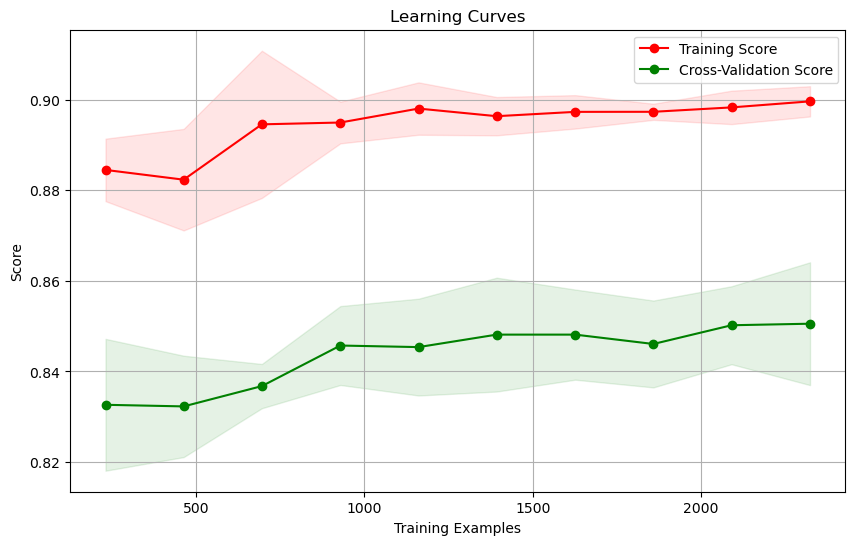

In [13]:
def plot_learning_curves(train_sizes, train_scores, valid_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Learning Curves")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-Validation Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

def evaluate_classifier(df, pos_label, dataset_Name):
    # Convert non-numeric columns to numeric using LabelEncoder
    df_numeric = df.apply(LabelEncoder().fit_transform)

    # Impute missing values
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

    # Split the dataset into features (X) and target (y)
    X = df_imputed.drop(columns=['Target'])
    y = df_imputed['Target']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the training features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Plot learning curves
    train_sizes, train_scores, valid_scores = learning_curve(KNeighborsClassifier(), X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')
    plot_learning_curves(train_sizes, train_scores, valid_scores)
    
evaluate_classifier(df, 1, 'STUDENTS DROPOUT PREDICTION DATASET')

# Feature Selection with Visual Representation

Dataset Name: STUDENTS DROPOUT PREDICTION DATASET

Accuracy with SelectKBest: 0.8732782369146006
Accuracy with RFE: 0.8787878787878788
Accuracy with PCA: 0.8553719008264463



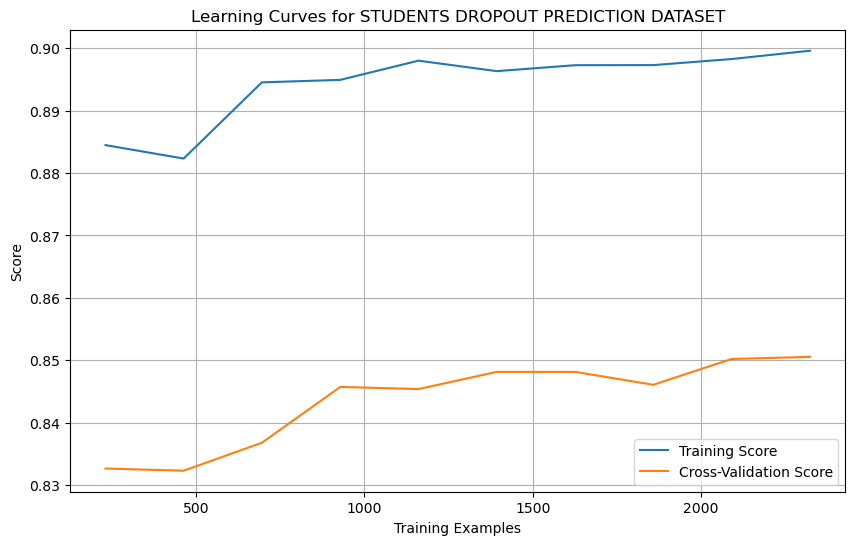

In [16]:
def evaluate_classifier(df, pos_label, dataset_name):
    # Convert non-numeric columns to numeric using LabelEncoder
    df_numeric = df.apply(LabelEncoder().fit_transform)

    # Impute missing values
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

    # Split the dataset into features (X) and target (y)
    X = df_imputed.drop(columns=['Target'])
    y = df_imputed['Target']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Select top k features using SelectKBest with mutual information
    k_best_selector = SelectKBest(score_func=mutual_info_classif, k=10)
    X_train_k_best = k_best_selector.fit_transform(X_train_scaled, y_train)
    X_test_k_best = k_best_selector.transform(X_test_scaled)

    # Wrapper: Recursive Feature Elimination (RFE) with RandomForestClassifier
    rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
    X_train_rfe = rfe_selector.fit_transform(X_train_scaled, y_train)
    X_test_rfe = rfe_selector.transform(X_test_scaled)

    # PCA: Reduce dimensionality
    pca = PCA(n_components=10)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train KNN classifier using selected features from each technique

    # With SelectKBest
    knn = KNeighborsClassifier()
    knn.fit(X_train_k_best, y_train)
    y_pred_k_best = knn.predict(X_test_k_best)
    accuracy_k_best = accuracy_score(y_test, y_pred_k_best)

    # With RFE
    knn.fit(X_train_rfe, y_train)
    y_pred_rfe = knn.predict(X_test_rfe)
    accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

    # With PCA
    knn.fit(X_train_pca, y_train)
    y_pred_pca = knn.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)

    # Print evaluation metrics
    print("Dataset Name:", dataset_name)
    print()
    print("Accuracy with SelectKBest:", accuracy_k_best)
    print("Accuracy with RFE:", accuracy_rfe)
    print("Accuracy with PCA:", accuracy_pca)
    print()

    # Plot learning curves
    plot_learning_curves(X_train_scaled, y_train, 1, dataset_name)

def plot_learning_curves(X, y, pos_label, dataset_name):
    knn = KNeighborsClassifier()
    train_sizes, train_scores, valid_scores = learning_curve(knn, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Cross-Validation Score')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title('Learning Curves for {}'.format(dataset_name))
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function with your dataset
evaluate_classifier(df, 1, 'STUDENTS DROPOUT PREDICTION DATASET')

## Summary Report
### Accuracy with SelectKBest: 87.33%

1) SelectKBest performed closely behind RFE (0.8733). This suggests that SelectKBest is also a viable option for feature selection, potentially offering a balance between accuracy and reducing the number of features.
### Accuracy with RFE: 87.88%

1) RFE (Recursive Feature Elimination) achieved the highest accuracy (0.8788). This indicates that RFE effectively identified the most relevant features for dropout prediction in this dataset.
### Accuracy with PCA: 85.54%

1) PCA (Principal Component Analysis) resulted in a lower accuracy (0.8554). This implies that PCA might have removed some informative features for dropout prediction in this specific dataset. PCA often reduces dimensionality by capturing the most variance, but in this case, it might have discarded features that were important for the model's performance.

### Summary Interpretation:

1) Feature selection techniques like RFE and SelectKBest can be beneficial for student dropout prediction by focusing the model on the most informative features. This can potentially lead to better prediction accuracy and reduce model complexity.
2) PCA might not be the most suitable choice for this dataset if it eliminates features crucial for dropout prediction.



# 

# Logistic Regression

In [17]:
def evaluate_classifier(df, pos_label, dataset_name):
    # Convert non-numeric columns to numeric using LabelEncoder
    df_numeric = df.apply(LabelEncoder().fit_transform)

    # Impute missing values
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

    # Split the dataset into features (X) and target (y)
    X = df_imputed.drop(columns=['Target'])
    y = df_imputed['Target']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train logistic regression classifier
    lr = LogisticRegression()
    lr.fit(X_train_scaled, y_train)
    y_pred_lr = lr.predict(X_test_scaled)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_lr)
    precision = precision_score(y_test, y_pred_lr, pos_label=pos_label)
    recall = recall_score(y_test, y_pred_lr, pos_label=pos_label)
    f1_pos = f1_score(y_test, y_pred_lr, pos_label=pos_label)
    f1_neg = f1_score(y_test, y_pred_lr, pos_label=1 - pos_label)
    auc = roc_auc_score(y_test, y_pred_lr)

    # Print evaluation metrics
    print("Dataset Name:", dataset_name)
    print("Accuracy:", accuracy)
    print("Precision (Positive Class):", precision)
    print("Recall (Positive Class):", recall)
    print("F1 Score (Positive Class):", f1_pos)
    print("F1 Score (Negative Class):", f1_neg)
    print("AUC Score:", auc)

# Call the function with your dataset
evaluate_classifier(df, 1, 'STUDENTS DROPOUT PREDICTION DATASET')

Dataset Name: STUDENTS DROPOUT PREDICTION DATASET
Accuracy: 0.9132231404958677
Precision (Positive Class): 0.9106382978723404
Recall (Positive Class): 0.9532293986636972
F1 Score (Positive Class): 0.9314472252448313
F1 Score (Negative Class): 0.8818011257035646
AUC Score: 0.9008024249636175


## Summary Report
High Overall Accuracy (0.9132): The model correctly classified over 91% of the data points, suggesting strong performance in predicting student dropout.

Balanced Precision (0.9106) and Recall (0.9532) for Positive Class (Dropout):

Precision indicates that out of the predicted dropouts, 91% were actual dropouts, demonstrating a low rate of false positives.
Recall suggests that the model identified 95% of the actual dropouts, minimizing false negatives (missed dropouts).
F1 Score (0.9314) for Positive Class: This balanced metric between precision and recall confirms the model's effectiveness in accurately classifying dropouts.

F1 Score (0.8818) for Negative Class (No Dropout): This score is slightly lower than the positive class F1, but still acceptable. It suggests the model performs well in identifying non-dropouts as well.

High AUC Score (0.9008): The Area Under the ROC Curve (AUC) score is close to 1, indicating a good overall ability to differentiate between dropouts and non-dropouts.

### Summary Interpretation:

Overall, these results suggest that the model can effectively predict student dropout with high accuracy and a balanced performance in identifying both dropout and non-dropout cases.

# Overall Interpretation


## The model shows promising results for dropout prediction, achieving high accuracy, balanced identification of dropouts, and good overall ability to differentiate between dropout and non-dropout cases.

## Feature selection techniques can slightly decrease accuracy, suggesting that some informative features might be discarded.

## Cross-validation confirms generalizability but highlights a potential weakness in identifying non-dropouts..